<a href="https://colab.research.google.com/github/hajnayeb/Python_Web_Scraping/blob/main/Stock_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install html5lib
!pip install beautifulSoup4
!pip install requests

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import html5lib
from matplotlib import pyplot as plt

In [27]:
#  Extracting Tesla Stock Data Using yfinance
tesla = yf.Ticker("TSLA")

In [28]:
# Extracting Tesla Revenue Data Using Webscraping
tesla_data=tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


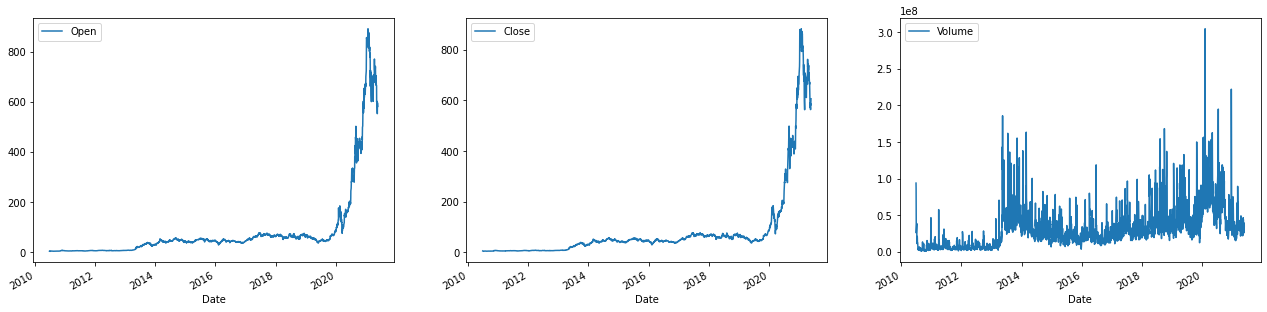

In [11]:
dft = pd.DataFrame(tesla_data,columns=['Date','Open','High','Close','Volume'])
dft.reset_index(inplace=True)
fig_dims = (22, 5)
figure, axes = plt.subplots(1, 3, figsize=fig_dims)
dft.plot(x="Date",y='Open', kind = 'line',ax=axes[0])
dft.plot(x="Date",y='Close', kind = 'line',ax=axes[1])
dft.plot(x="Date",y='Volume', kind = 'line',ax=axes[2])

In [100]:
#reading Tesla revenue data
tables = pd.read_html('https://ycharts.com/companies/TSLA/revenues')
t1=tables[0]
t1.columns=['Date','revenue']
t1['revenue'] = t1['revenue'].str.replace('B', '')
t1['revenue'] = t1['revenue'].str.replace('M', '/1000')
#eval(t1['revenue'][2])
t1['revenue'] = t1['revenue'].apply(eval)
t1.tail()

,Date,revenue
20,"March 31, 2016",1.14700
21,"Dec. 31, 2015",1.21400
22,"Sept. 30, 2015",0.93679
23,"June 30, 2015",0.95498
24,"March 31, 2015",0.93988


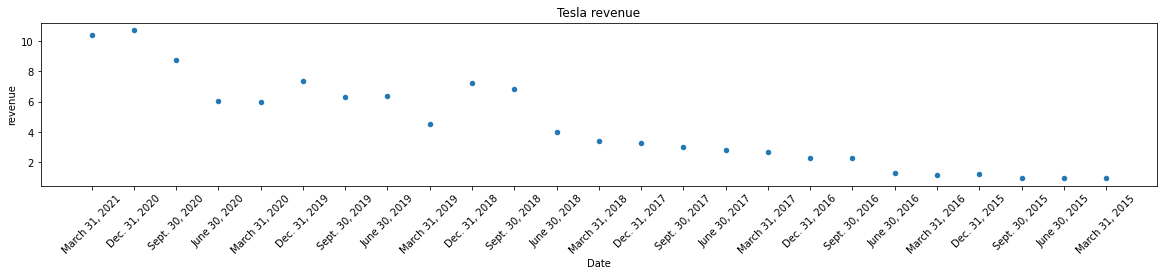

In [101]:
ax = t1.plot(x="Date",y='revenue', kind = 'scatter',title='Tesla revenue',figsize=(20,3))
ax.tick_params(axis='x', labelrotation = 45)

[35940000, 31536000, 24578000, 21461268]


Text(0.5, 1.0, 'Tesla Corp. total revenue')

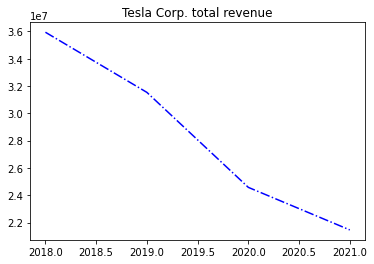

In [13]:
h_t = requests.get("https://finance.yahoo.com/quote/TSLA/financials?p=TSLA").text
soup = BeautifulSoup(h_t,'lxml')
revenue = soup.find_all('div', class_="D(tbr) fi-row Bgc($hoverBgColor):h")  # table data
revenue2 = revenue[0].find_all('span')  # revenue numeric data
#pd.read_html(revenue)
r_TSLA=[]
for i in revenue2[1:-1]:
    n=int(i.text.replace(',',''))
    r_TSLA.append(n)
x=list(range(2018,2022))
print(r_TSLA)
from matplotlib import pyplot as plt
plt.plot(x,r_TSLA,'b-.')
plt.title('Tesla Corp. total revenue')

In [16]:
#  Extracting GameStop Stock Data Using yfinance
gs = yf.Ticker("GME")

In [66]:
# Extracting GameStop general and Revenue Data Using Webscraping
gs_data=gs.history(period="max")
gs_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000,0.0,0.0
2002-02-14,6.850831,6.864296,6.682506,6.733003,2755400,0.0,0.0
2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400,0.0,0.0
2002-02-19,6.665671,6.665671,6.312189,6.430017,1852600,0.0,0.0
2002-02-20,6.463681,6.648838,6.413183,6.648838,1723200,0.0,0.0


In [21]:
dfgs = pd.DataFrame(gs_data,columns=['Open','High','Close','Volume'])
dfgs.reset_index(inplace=True)
#plt.plot(df,x="Date", y="Open")
dfgs.head(3)

,Date,Open,High,Close,Volume
0,2002-02-13,6.480513,6.773399,6.766666,19054000
1,2002-02-14,6.850831,6.864296,6.733003,2755400
2,2002-02-15,6.733001,6.749833,6.699336,2097400


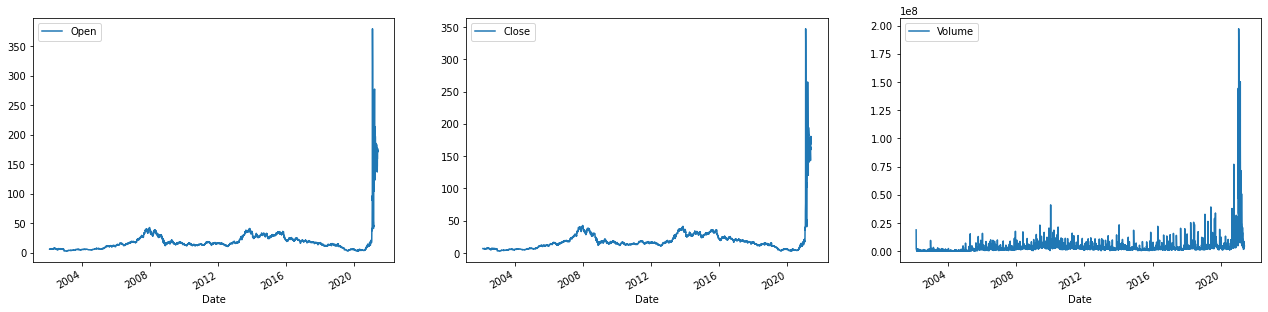

In [23]:
fig_dims = (22, 5)
figure, axes = plt.subplots(1, 3, figsize=fig_dims)
dfgs.plot(x="Date",y='Open', kind = 'line',ax=axes[0])
dfgs.plot(x="Date",y='Close', kind = 'line',ax=axes[1])
dfgs.plot(x="Date",y='Volume', kind = 'line',ax=axes[2])

In [97]:
#reading Gamestop revenue data
tables = pd.read_html('https://ycharts.com/companies/GME/revenues_ttm')
t1=tables[0]
t1.columns=['Date','revenue']
t1['revenue'] = t1['revenue'].str.replace('B', '')
t1['revenue'] = t1['revenue'].str.replace('M', '/1000')
#eval(t1['revenue'][2])
t1['revenue'] = t1['revenue'].apply(eval)
t1.tail()

,Date,revenue
20,"Jan. 31, 2016",9.364
21,"Oct. 31, 2015",9.315
22,"July 31, 2015",9.391
23,"April 30, 2015",9.360
24,"Jan. 31, 2015",9.296


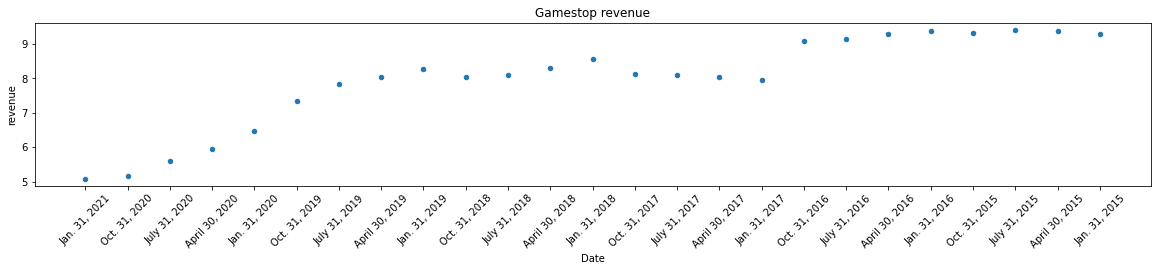

In [98]:
ax = t1.plot(x="Date",y='revenue', kind = 'scatter',title='Gamestop revenue',figsize=(20,3))
ax.tick_params(axis='x', labelrotation = 45)

In [24]:
dfs = pd.read_html('https://finance.yahoo.com/quote/GME/')
dfs[1]

,0,1
0,Market Cap,12.74B
1,Beta (5Y Monthly),-1.94
2,PE Ratio (TTM),NaN
3,EPS (TTM),-3.31
4,Earnings Date,"Jun 23, 2021 - Jun 30, 2021"
5,Forward Dividend & Yield,N/A (N/A)
6,Ex-Dividend Date,"Mar 14, 2019"
7,1y Target Est,48.17


[5089800, 5089800, 6466000, 8285300]


Text(0.5, 1.0, 'GameStop Corp. total revenue')

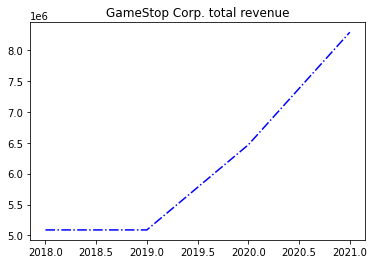

In [25]:
h_t = requests.get("https://finance.yahoo.com/quote/GME/financials?p=GME").text
soup = BeautifulSoup(h_t,'lxml')
revenue = soup.find_all('div', class_="D(tbr) fi-row Bgc($hoverBgColor):h")  # table data
revenue2 = revenue[0].find_all('span')  # revenue numeric data
#pd.read_html(revenue)
r_gme=[]
for i in revenue2[1:-1]:
    n=int(i.text.replace(',',''))
    r_gme.append(n)
x=list(range(2018,2022))
print(r_gme)
plt.plot(x,r_gme,'b-.')
plt.title('GameStop Corp. total revenue')